In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import special

In [2]:
""" 1.a """
g = [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
n, p = 2, 0.5 # τιμ΄΄ή bit 0 ή 1 με ίση πιθανότητα εμφάνισης 0.5
bitstream_len = 36
#random_bits = np.random.binomial(1, 0.5, bitstream_len) # τυχαία ακολουθία από 36 bits
random_bits = np.array(g)
print("Random " + str(bitstream_len) + "-bit stream")
print(random_bits)

Random 36-bit stream
[1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1]


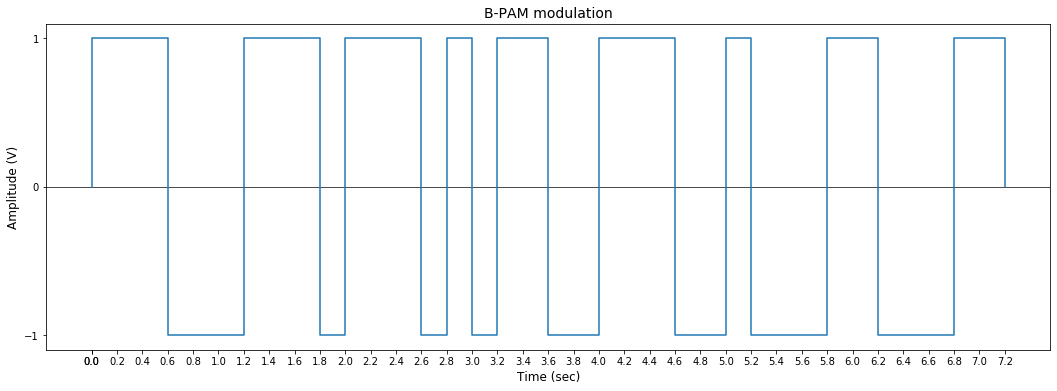

In [3]:
""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε A = 1 Volt"""
AM = 1

""" ΑΜ: 03115151 άρα 1+5+1=7 οπότε A = 7 Volts """
#AM = 7

Tb = 0.2 #sec (διάρκεια κάθε bit)
A = AM #Volts (πλάτος)

bitsB_PAM = [0.0]
time = [0.0]

bpam = lambda b : (2*A*b - A)

""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της γραφικής παράστασης του σήματος """
t = 0.0
for bit in random_bits:
    bitsB_PAM.append(bpam(bit))
    time.append(t)
    t += Tb
    
bitsB_PAM.append(0.0)
time.append(len(random_bits)*Tb)

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('B-PAM modulation', fontsize = 14)
ax.set_xlabel('Time (sec)', fontsize = 12)
ax.set_ylabel('Amplitude (V)', fontsize = 12)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.step(time, bitsB_PAM, where = 'post')
plt.xticks(time)
plt.yticks([-A,0,A])
plt.show()

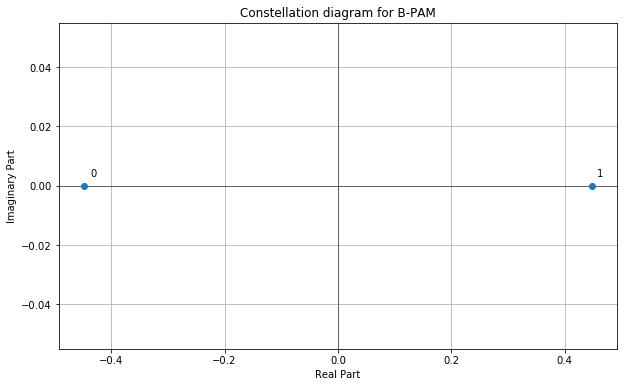

In [4]:
""" 1.b """
Eb = (A**2) * Tb # Μέση ενέργεια συμβόλου (joules/bit)
""" Τα σημεία αστερισμού είναι τα (-ριζα(Εb),0) για το bit 0
    και (ριζα(Εb),0) για το bit 1 """
v0 = -np.sqrt(Eb)
v1 = np.sqrt(Eb)
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.show()

In [5]:
""" 1.c """
class AWGN:
    def __init__(self, N0, lenght):
        # Z = X + jY (AWGN signal)
        self.real = np.random.normal(0, np.sqrt(N0/2), size=lenght) #X
        self.imag = np.random.normal(0, np.sqrt(N0/2), size=lenght) #Y

def add_AWGN(signal, AWGN):
    # προσθέτουμε τον AWGN θόρυβο στο σήμα
    yout = []
    for i in range(0, len(signal)):
        yout.append(signal[i] + complex(AWGN.real[i],AWGN.imag[i]))
    
    return yout

calculate_N0 = lambda SNR : Eb / 10**(SNR/10)

In [6]:
# Eb/N0 = 6dB
SNR = 6 #dB
AWGNsignal1 = AWGN(calculate_N0(SNR), len(bitsB_PAM))
""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της
    γραφικής παράστασης του σήματος άρα τα θέτουμε και στον AWGN θόρυβο ίσα με 0.0 """
AWGNsignal1.real[0] = 0.0
AWGNsignal1.real[len(AWGNsignal1.real)-1] = 0.0
AWGNsignal1.imag[0] = 0.0
AWGNsignal1.imag[len(AWGNsignal1.real)-1] = 0.0

s1 = add_AWGN(bitsB_PAM, AWGNsignal1)

In [7]:
# Eb/N0 = 12dB
SNR = 12 #dB
AWGNsignal2 = AWGN(calculate_N0(SNR), len(bitsB_PAM))
""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της
    γραφικής παράστασης του σήματος άρα τα θέτουμε και στον AWGN θόρυβο ίσα με 0.0 """
AWGNsignal2.real[0] = 0.0
AWGNsignal2.real[len(AWGNsignal2.real)-1] = 0.0
AWGNsignal2.imag[0] = 0.0
AWGNsignal2.imag[len(AWGNsignal2.real)-1] = 0.0

s2 = add_AWGN(bitsB_PAM, AWGNsignal2)

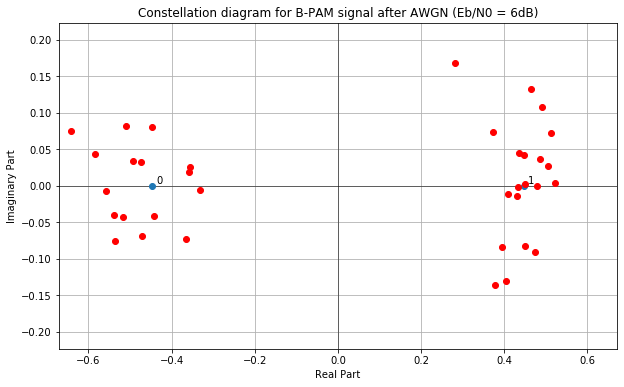

In [8]:
""" 1.d """
# Διάγραμμα αστερισμού για το σήμα s1
Eb = (A**2) * Tb # Μέση ενέργεια συμβόλου (joules/bit)
v0 = -np.sqrt(Eb)
v1 = np.sqrt(Eb)
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i in range(1, len(s1)-1):
    X = s1[i].real * np.sqrt(Tb)
    Y = s1[i].imag * np.sqrt(Tb)
    plt.plot(X, Y, 'o', color='r')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM signal after AWGN (Eb/N0 = 6dB)')
plt.xlabel('Real Part')
plt.xlim([-1.5 * np.sqrt(Eb), 1.5 * np.sqrt(Eb)])
plt.ylabel('Imaginary Part')
plt.ylim([-0.5 * np.sqrt(Eb), 0.5 * np.sqrt(Eb)])
plt.grid(True)
plt.show()

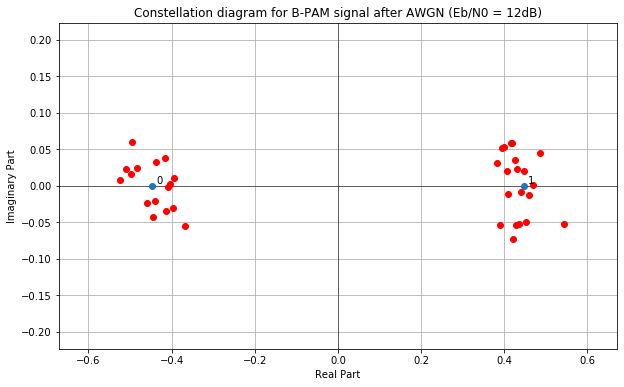

In [9]:
# Διάγραμμα αστερισμού για το σήμα s2
Eb = A**2*Tb # Μέση ενέργεια συμβόλου (joules/bit)
v0 = -np.sqrt(Eb)
v1 = np.sqrt(Eb)
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i in range(1, len(s1)-1):
    X = s2[i].real * np.sqrt(Tb)
    Y = s2[i].imag * np.sqrt(Tb)
    plt.plot(X, Y, 'o', color='r')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM signal after AWGN (Eb/N0 = 12dB)')
plt.xlabel('Real Part')
plt.xlim([-1.5 * np.sqrt(Eb), 1.5 * np.sqrt(Eb)])
plt.ylabel('Imaginary Part')
plt.ylim([-0.5 * np.sqrt(Eb), 0.5 * np.sqrt(Eb)])
plt.grid(True)
plt.show()

In [23]:
""" 1.e """
n, p = 2, 0.5 # τιμ΄΄ή bit 0 ή 1 με ίση πιθανότητα εμφάνισης 0.5
bitstream_len = 1000000 # ένας ικανοποιητικός αριθμός τυχαίων bits

# Δοκιμάζουμε SNR από 0 έως 15 dB
SNR = np.arange(0,16,1)

BER_exp = np.zeros(16) # πειραματικό BER

# υπολογισμός θεωρητικού BER
Q = lambda z : 0.5*special.erfc(z/np.sqrt(2))
calc_BER_th = lambda SNR : Q(A/np.sqrt(calculate_N0(SNR)/2))
snr = np.arange(0,16,0.1)
BER_th = list(map(calc_BER_th, snr))

decoder = lambda v : 1 if (v.real >= 0) else 0
# αν η αποκωδικοποίηση βρήκε διαφορετική τιμή απ την πραγματική τιμή του bit, τότε έχουμε error
error = lambda bit, v : (bit != decoder(v))

for Snr in SNR:
    bits = np.random.binomial(1, 0.5, size=bitstream_len) #τυχαία ακολουθία από 1000000 bits
    B_PAM = list(map(bpam, bits))
    
    AWGNsignal = AWGN(calculate_N0(Snr), bitstream_len)
    s = add_AWGN(B_PAM, AWGNsignal) #σήμα μαζί με τον AWGN θόρυβο
    errors = 0
    for i, bit in enumerate(bits):
        if (error(bit, s[i])):
            errors += 1
            
    BER_exp[Snr] = errors / bitstream_len

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



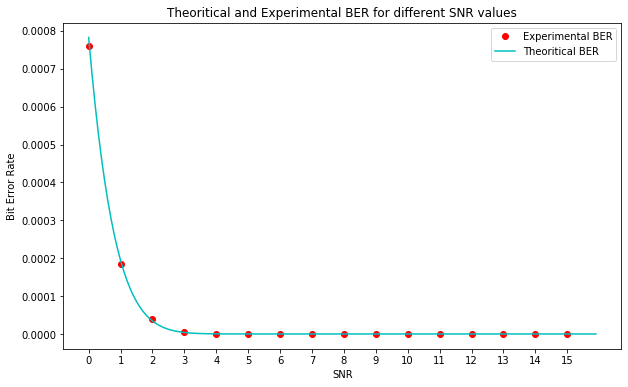

In [14]:
fig = plt.figure(figsize=(10,6))
plt.plot(SNR, BER_exp, 'o', color = 'r', label = 'Experimental BER')
plt.plot(snr, BER_th, color = 'c', label = 'Theoritical BER')
plt.xticks(SNR)
plt.title('Theoritical and Experimental BER for different SNR values')
plt.xlabel('SNR')
plt.ylabel('Bit Error Rate')
plt.legend()
plt.show()

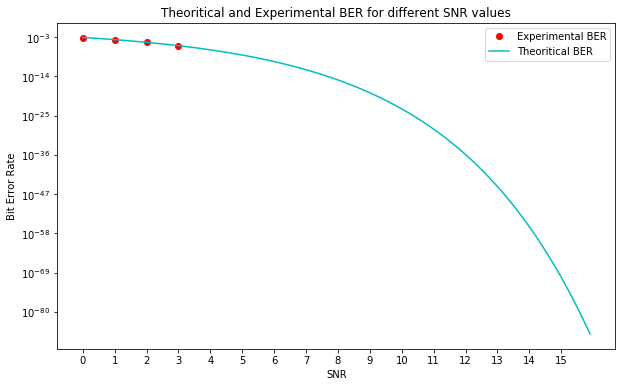

In [15]:
fig = plt.figure(figsize=(10,6))
plt.plot(SNR, BER_exp, 'o', color = 'r', label = 'Experimental BER')
plt.plot(snr, BER_th, color = 'c', label = 'Theoritical BER')
plt.xticks(SNR)
plt.yscale('log')
plt.title('Theoritical and Experimental BER for different SNR values')
plt.xlabel('SNR')
plt.ylabel('Bit Error Rate')
plt.legend()
plt.show()

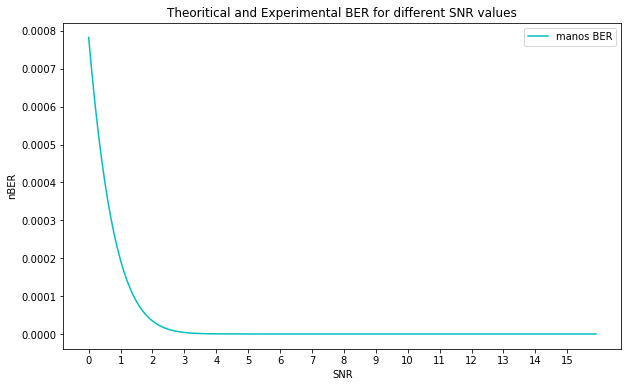

In [15]:
# υπολογισμός θεωρητικού BER
Q = lambda z : 0.5*special.erfc(z/np.sqrt(2))
calc_BER_th = lambda SNR : Q(A/np.sqrt(calculate_N0(SNR)/2))
snr = np.arange(0,16,0.1)
ther = list(map(calc_BER_th, snr))

manos = lambda SNR : sct.norm.sf(np.sqrt(2*10**(SNR/10)))
m = list(map(calc_BER_th, snr))

fig = plt.figure(figsize=(10,6))
#plt.plot(snr, ther, color = 'r', label = 'ther BER')
plt.plot(snr, m, color = 'c', label = 'manos BER')
plt.xticks(SNR)
plt.title('Theoritical and Experimental BER for different SNR values')
plt.xlabel('SNR')
plt.ylabel('nBER')
plt.legend()
plt.show()

c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


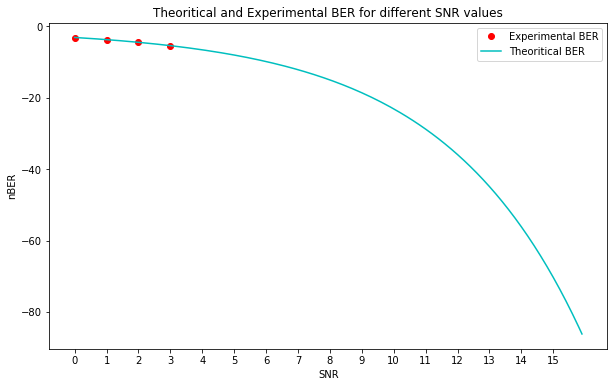

In [16]:
ther = np.log10(BER_th)
exp = np.log10(BER_exp)



fig = plt.figure(figsize=(10,6))
plt.plot(SNR, exp, 'o', color = 'r', label = 'Experimental BER')
plt.plot(snr, ther, color = 'c', label = 'Theoritical BER')
plt.xticks(SNR)
plt.title('Theoritical and Experimental BER for different SNR values')
plt.xlabel('SNR')
plt.ylabel('nBER')
plt.legend()
plt.show()

In [17]:
print(BER_exp)

[8.15e-04 2.37e-04 3.40e-05 2.00e-06 1.00e-06 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
